In [376]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [377]:
df_delay = pd.read_excel('get_around_delay_analysis.xlsx', engine='openpyxl')

In [342]:
# Basic stats
print("Number of rows : {}".format(df_delay.shape[0]))
print()
print("Number of columns : {}".format(df_delay.shape[1]))
print()

print("Display of dataset: ")
display(df_delay.head())
print()

print("Basics statistics: ")
data_desc = df_delay.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*df_delay.isnull().sum()/df_delay.shape[0])

Number of rows : 21310

Number of columns : 7

Display of dataset: 


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN



Basics statistics: 


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000



Percentage of missing values: 


rental_id                                      0.000000
car_id                                         0.000000
checkin_type                                   0.000000
state                                          0.000000
delay_at_checkout_in_minutes                  23.294228
previous_ended_rental_id                      91.360863
time_delta_with_previous_rental_in_minutes    91.360863
dtype: float64

In [378]:
# Is the driver cancelling his reservation because of the delay at checkout from the first driver? 

In [379]:
df_time_delta_with_previous_rental_in_minutes = df_delay.dropna(axis=0, subset=['time_delta_with_previous_rental_in_minutes']).reset_index(drop=True)
df_time_delta_with_previous_rental_in_minutes

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,511639,370585,connect,ended,-15.0,563782.0,570.0
1,519491,312389,mobile,ended,58.0,545639.0,420.0
2,521156,392479,mobile,ended,NaN,537298.0,0.0
3,525044,349751,mobile,ended,NaN,510607.0,60.0
4,528808,181625,connect,ended,-76.0,557404.0,330.0
...,...,...,...,...,...,...,...
1836,568049,381499,connect,canceled,NaN,562174.0,720.0
1837,568241,396409,mobile,canceled,NaN,566136.0,570.0
1838,568523,297973,mobile,ended,12.0,567121.0,240.0
1839,569717,377312,mobile,ended,230.0,545045.0,90.0


In [345]:
# Remove outliers
upper_limit = df_time_delta_with_previous_rental_in_minutes['delay_at_checkout_in_minutes'].mean() + 3*df_time_delta_with_previous_rental_in_minutes['delay_at_checkout_in_minutes'].std()
lower_limit = df_time_delta_with_previous_rental_in_minutes['delay_at_checkout_in_minutes'].mean() - 3*df_time_delta_with_previous_rental_in_minutes['delay_at_checkout_in_minutes'].std()
df_time_delta_with_previous_rental_in_minutes_clean = df_time_delta_with_previous_rental_in_minutes[(df_time_delta_with_previous_rental_in_minutes['delay_at_checkout_in_minutes']<upper_limit) & (df_time_delta_with_previous_rental_in_minutes['delay_at_checkout_in_minutes']>lower_limit)]
df_time_delta_with_previous_rental_in_minutes_clean

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,511639,370585,connect,ended,-15.0,563782.0,570.0
1,519491,312389,mobile,ended,58.0,545639.0,420.0
4,528808,181625,connect,ended,-76.0,557404.0,330.0
5,533670,320824,connect,ended,-6.0,556563.0,630.0
6,534827,404169,mobile,ended,-7.0,531158.0,90.0
...,...,...,...,...,...,...,...
1833,571823,353425,connect,ended,-276.0,569556.0,240.0
1834,573274,298117,connect,ended,-7.0,571227.0,210.0
1835,567741,294059,mobile,ended,111.0,567708.0,120.0
1838,568523,297973,mobile,ended,12.0,567121.0,240.0


<AxesSubplot: xlabel='time_delta_with_previous_rental_in_minutes', ylabel='delay_at_checkout_in_minutes'>

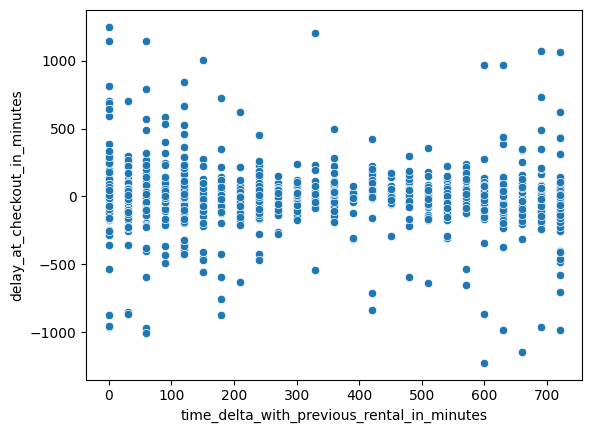

In [382]:
sns.scatterplot(df_time_delta_with_previous_rental_in_minutes_clean, x='time_delta_with_previous_rental_in_minutes', y='delay_at_checkout_in_minutes')

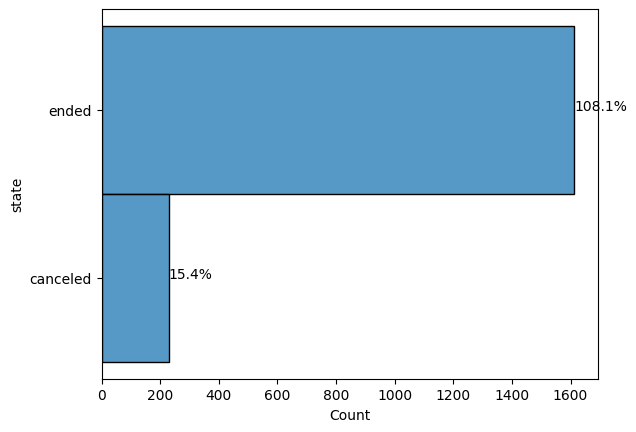

In [346]:
ax = sns.histplot(y=df_time_delta_with_previous_rental_in_minutes['state']);
total = len(df_time_delta_with_previous_rental_in_minutes_clean['state'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

In [380]:
df_time_delta_with_previous_rental_in_minutes
delay_at_co= df_time_delta_with_previous_rental_in_minutes[['previous_ended_rental_id']][df_time_delta_with_previous_rental_in_minutes['state'] == 'canceled'].merge(df_delay[['rental_id', 'car_id','checkin_type','state','delay_at_checkout_in_minutes','time_delta_with_previous_rental_in_minutes']],how='left',left_on='previous_ended_rental_id', right_on='rental_id')
delay_at_co

,previous_ended_rental_id,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,time_delta_with_previous_rental_in_minutes
0,543010.0,543010,374169,connect,ended,42.0,120.0
1,546578.0,546578,352528,connect,ended,-536.0,NaN
2,552005.0,552005,341431,mobile,ended,-88.0,NaN
3,566412.0,566412,317378,connect,ended,-129.0,NaN
4,545076.0,545076,377700,mobile,ended,-35.0,NaN
...,...,...,...,...,...,...,...
224,568465.0,568465,390871,connect,ended,NaN,NaN
225,552222.0,552222,405564,mobile,ended,NaN,NaN
226,558088.0,558088,245154,connect,ended,-40.0,180.0
227,562174.0,562174,381499,connect,ended,73.0,NaN


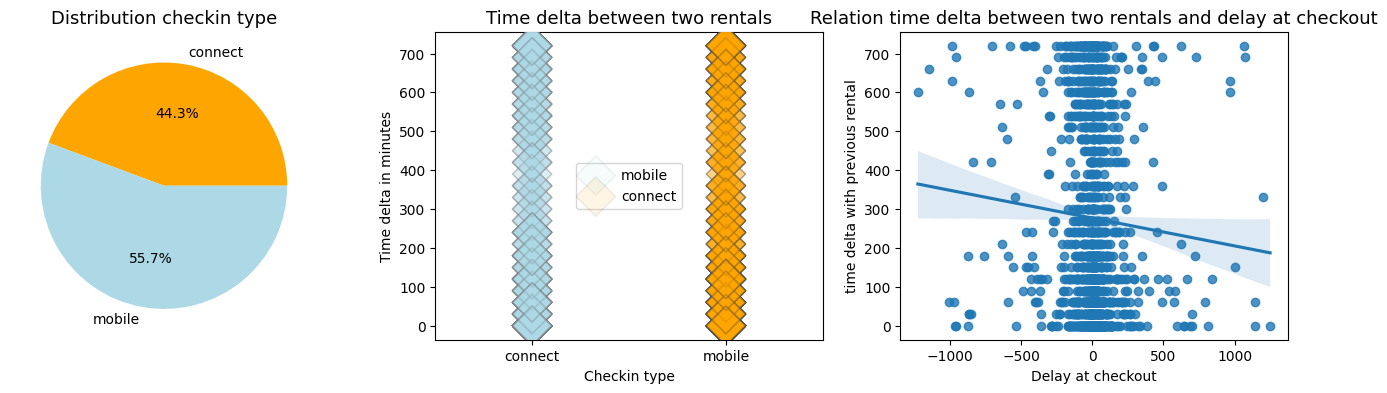

In [381]:
fig, axes = plt.subplots(ncols=3, figsize=(17, 4), dpi=100)
#plt.tight_layout()

palette ={'mobile':"orange",'connect':"lightblue"}
labels=['mobile', 'connect']
df_time_delta_with_previous_rental_in_minutes_clean.groupby('checkin_type').count()['time_delta_with_previous_rental_in_minutes'].plot(kind='pie', autopct='%1.1f%%', colors= [palette[key] for key in labels[0:]],  ax=axes[0]);
sns.stripplot(data=df_time_delta_with_previous_rental_in_minutes_clean, y="time_delta_with_previous_rental_in_minutes", x="checkin_type", hue='checkin_type', ax=axes[1], palette=palette,
jitter=False, s=20, marker="D", linewidth=1, alpha=.1,);
axes[1].legend(loc='center', labels=['mobile', 'connect']);
sns.regplot(df_time_delta_with_previous_rental_in_minutes_clean, y='time_delta_with_previous_rental_in_minutes', x='delay_at_checkout_in_minutes', ax=axes[2]);

axes[0].set_ylabel('');
axes[1].set_ylabel('');
axes[0].set_title('Distribution checkin type', fontsize=13);
axes[1].set_title('Time delta between two rentals', fontsize=13);
axes[1].set_ylabel('Time delta in minutes');
axes[1].set_xlabel('Checkin type');
axes[2].set_title('Relation time delta between two rentals and delay at checkout', fontsize=13);
axes[2].set_ylabel('time delta with previous rental');
axes[2].set_xlabel('Delay at checkout');

In [348]:

px.box(delay_at_co, x="delay_at_checkout_in_minutes", title="Delay from previous rental")


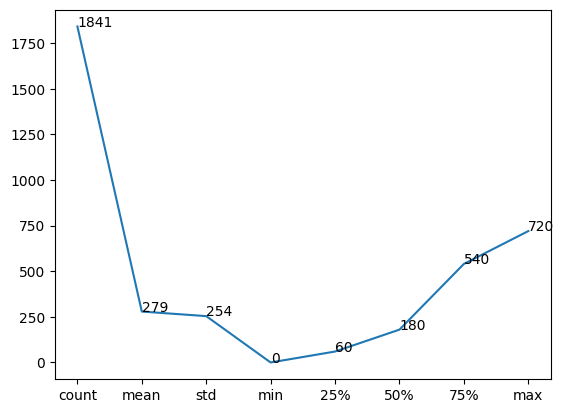

In [349]:
df_time_delta_with_previous_rental_in_minutes_plot = pd.DataFrame(df_time_delta_with_previous_rental_in_minutes['time_delta_with_previous_rental_in_minutes'].describe().astype(int)).reset_index()
X = df_time_delta_with_previous_rental_in_minutes_plot['index']
Y = df_time_delta_with_previous_rental_in_minutes_plot['time_delta_with_previous_rental_in_minutes']
plt.figure()
plt.plot(X, Y)
for i in range(len(X)):
    plt.annotate(str(Y[i]), xy=(X[i], Y[i]))
plt.show()

In [350]:
delay_at_co= df_time_delta_with_previous_rental_in_minutes[['previous_ended_rental_id']][df_time_delta_with_previous_rental_in_minutes['state'] == 'canceled'].merge(df_delay[['rental_id', 'car_id','checkin_type','state','delay_at_checkout_in_minutes','time_delta_with_previous_rental_in_minutes']],how='left',left_on='previous_ended_rental_id', right_on='rental_id')
delay_at_co

,previous_ended_rental_id,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,time_delta_with_previous_rental_in_minutes
0,543010.0,543010,374169,connect,ended,42.0,120.0
1,546578.0,546578,352528,connect,ended,-536.0,NaN
2,552005.0,552005,341431,mobile,ended,-88.0,NaN
3,566412.0,566412,317378,connect,ended,-129.0,NaN
4,545076.0,545076,377700,mobile,ended,-35.0,NaN
...,...,...,...,...,...,...,...
224,568465.0,568465,390871,connect,ended,NaN,NaN
225,552222.0,552222,405564,mobile,ended,NaN,NaN
226,558088.0,558088,245154,connect,ended,-40.0,180.0
227,562174.0,562174,381499,connect,ended,73.0,NaN


In [351]:
df1 = df_time_delta_with_previous_rental_in_minutes
delay_at_co= df1[['previous_ended_rental_id']][df1['state'] == 'canceled'].merge(df_delay[['rental_id', 'car_id','checkin_type','state','delay_at_checkout_in_minutes','time_delta_with_previous_rental_in_minutes']],how='left',left_on='previous_ended_rental_id', right_on='rental_id')
delay_at_co

,previous_ended_rental_id,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,time_delta_with_previous_rental_in_minutes
0,543010.0,543010,374169,connect,ended,42.0,120.0
1,546578.0,546578,352528,connect,ended,-536.0,NaN
2,552005.0,552005,341431,mobile,ended,-88.0,NaN
3,566412.0,566412,317378,connect,ended,-129.0,NaN
4,545076.0,545076,377700,mobile,ended,-35.0,NaN
...,...,...,...,...,...,...,...
224,568465.0,568465,390871,connect,ended,NaN,NaN
225,552222.0,552222,405564,mobile,ended,NaN,NaN
226,558088.0,558088,245154,connect,ended,-40.0,180.0
227,562174.0,562174,381499,connect,ended,73.0,NaN


In [352]:
fig = px.box(delay_at_co, x="delay_at_checkout_in_minutes", title="Delay from previous rental")
fig.show()

In [353]:
fig = px.histogram(delay_at_co, x=delay_at_co["delay_at_checkout_in_minutes"]/len(delay_at_co["delay_at_checkout_in_minutes"]*100), color="checkin_type")
fig.show()

In [354]:
delay_at_co

,previous_ended_rental_id,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,time_delta_with_previous_rental_in_minutes
0,543010.0,543010,374169,connect,ended,42.0,120.0
1,546578.0,546578,352528,connect,ended,-536.0,NaN
2,552005.0,552005,341431,mobile,ended,-88.0,NaN
3,566412.0,566412,317378,connect,ended,-129.0,NaN
4,545076.0,545076,377700,mobile,ended,-35.0,NaN
...,...,...,...,...,...,...,...
224,568465.0,568465,390871,connect,ended,NaN,NaN
225,552222.0,552222,405564,mobile,ended,NaN,NaN
226,558088.0,558088,245154,connect,ended,-40.0,180.0
227,562174.0,562174,381499,connect,ended,73.0,NaN


In [372]:
result = []
for i in delay_at_co['delay_at_checkout_in_minutes']:
    if i < 0:
        result.append('driver late')
    elif i == 0:
        result.append('driver on time')
    else:
        result.append('driver in advance')
delay_at_co['type_driver'] = result
df = delay_at_co.groupby('type_driver')['delay_at_checkout_in_minutes'].agg(['max','min','median']).reset_index()
df.iloc[:,1:5] = df.iloc[:,1:5].astype(int)

C:\Users\fanny\AppData\Local\Temp\ipykernel_14068\3283592600.py:11: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



In [373]:
df = delay_at_co.groupby('type_driver')['delay_at_checkout_in_minutes'].agg(['max','min','median']).reset_index()
df.iloc[:,1:5] = df.iloc[:,1:5].astype(int)
df.rename(columns={'max':'max in min', 'min':'min in min','median':'median in min'})
df.style.hide_index()

C:\Users\fanny\AppData\Local\Temp\ipykernel_14068\1285855686.py:2: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

C:\Users\fanny\AppData\Local\Temp\ipykernel_14068\1285855686.py:4: FutureWarning:

this method is deprecated in favour of `Styler.hide(axis="index")`



type_driver,max,min,median
driver in advance,1466,1,52
driver late,-2,-1421,-87


In [374]:
import plotly.graph_objects as go
dfg = delay_at_co.groupby('type_driver')['delay_at_checkout_in_minutes'].agg(['max','min','median']).reset_index()
dfg

,type_driver,max,min,median
0,driver in advance,1466.0,1.0,52.5
1,driver late,-2.0,-1421.0,-87.0


In [375]:
sns.catplot(data=delay_at_co.groupby('type_driver').agg{'delay_at_checkout_in_minutes':'min','delay_at_checkout_in_minutes':'max', 'delay_at_checkout_in_minutes':'mean'}

SyntaxError: '(' was never closed (3511271099.py, line 1)

In [ ]:
salut = delay_at_co.groupby(delay_at_co['checkin_type'])['delay_at_checkout_in_minutes'].agg([('value negative' , lambda x : x[x < 0].count()) , ('value positive' , lambda x : x[x > 0].count())]).reset_index()
salut['total'] = salut['value negative'] + salut['value positive']
salut['% delay'] = (salut['value negative']/salut['total']*100).astype(int)
salut['% in advance'] = (salut['value positive']/salut['total']*100).astype(int)
salut

,checkin_type,value negative,value positive,total,% delay,% in advance
0,connect,66,56,122,54,45
1,mobile,34,50,84,40,59


In [ ]:
delay_at_co.groupby('checkin_type').count()['time_delta_with_previous_rental_in_minutes'].plot(kind='pie', autopct='%1.1f%%', colors= [palette[key] for key in labels[0:]],  ax=axes[0]);

In [ ]:
salut.T.reset_index()

,index,0,1
0,checkin_type,connect,mobile
1,value negative,66,34
2,value positive,56,50
3,total,122,84
4,% delay,54,40
5,% in advance,45,59


In [ ]:
salut

,checkin_type,value negative,value positive,total,% delay,% in advance
0,connect,66,56,122,54,45
1,mobile,34,50,84,40,59


In [ ]:
fig = px.pie(df, values='value negative', names='checkin_type', title='Population of European continent')
fig.show()

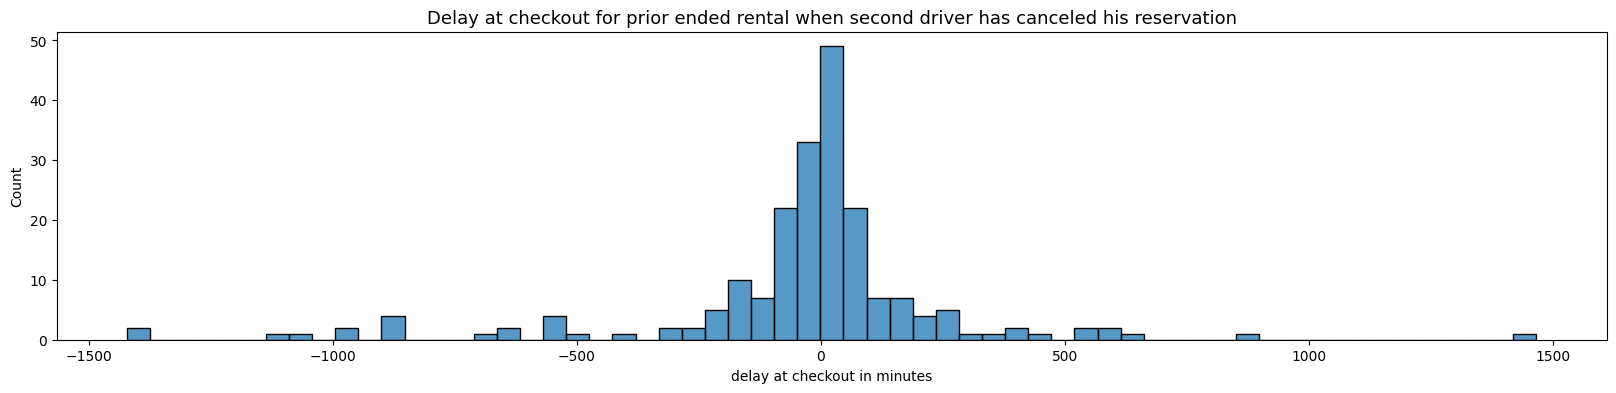

In [ ]:
plt.figure(figsize = (20,4));
ax = sns.histplot(data=delay_at_co, x='delay_at_checkout_in_minutes', stat='count');
ax.set_xlabel('delay at checkout in minutes');
ax.set_title('Delay at checkout for prior ended rental when second driver has canceled his reservation', fontsize=13);
plt.show()

In [ ]:
display(100*df_time_delta_with_previous_rental_in_minutes.isnull().sum()/df_time_delta_with_previous_rental_in_minutes.shape[0])

rental_id                                      0.000000
car_id                                         0.000000
checkin_type                                   0.000000
state                                          0.000000
delay_at_checkout_in_minutes                  17.707768
previous_ended_rental_id                       0.000000
time_delta_with_previous_rental_in_minutes     0.000000
dtype: float64

In [ ]:
# Analysis of time delta between two rentals

# DF DELAY

In [ ]:
df_delay = df_delay.drop(columns=['previous_ended_rental_id','time_delta_with_previous_rental_in_minutes'])
df_delay = df_delay.dropna(axis=0, subset='delay_at_checkout_in_minutes')
df_delay.head()


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes
1,507750,269550,mobile,ended,-81.0
2,508131,359049,connect,ended,70.0
5,511626,398802,mobile,ended,-203.0
6,511639,370585,connect,ended,-15.0
7,512303,371242,mobile,ended,-44.0


In [ ]:
display(100*df_delay.isnull().sum()/df_delay.shape[0])

rental_id                       0.0
car_id                          0.0
checkin_type                    0.0
state                           0.0
delay_at_checkout_in_minutes    0.0
dtype: float64

In [ ]:
# Remove outliers
upper_limit = df_delay['delay_at_checkout_in_minutes'].mean() + 3*df_delay['delay_at_checkout_in_minutes'].std()
lower_limit = df_delay['delay_at_checkout_in_minutes'].mean() - 3*df_delay['delay_at_checkout_in_minutes'].std()
df_delay_clean = df_delay[(df_delay['delay_at_checkout_in_minutes']<upper_limit) & (df_delay['delay_at_checkout_in_minutes']>lower_limit)]
df_delay_clean

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes
1,507750,269550,mobile,ended,-81.0
2,508131,359049,connect,ended,70.0
5,511626,398802,mobile,ended,-203.0
6,511639,370585,connect,ended,-15.0
7,512303,371242,mobile,ended,-44.0
...,...,...,...,...,...
21304,573322,376491,connect,ended,-66.0
21306,573790,341965,mobile,ended,-337.0
21307,573791,364890,mobile,ended,144.0
21308,574852,362531,connect,ended,-76.0


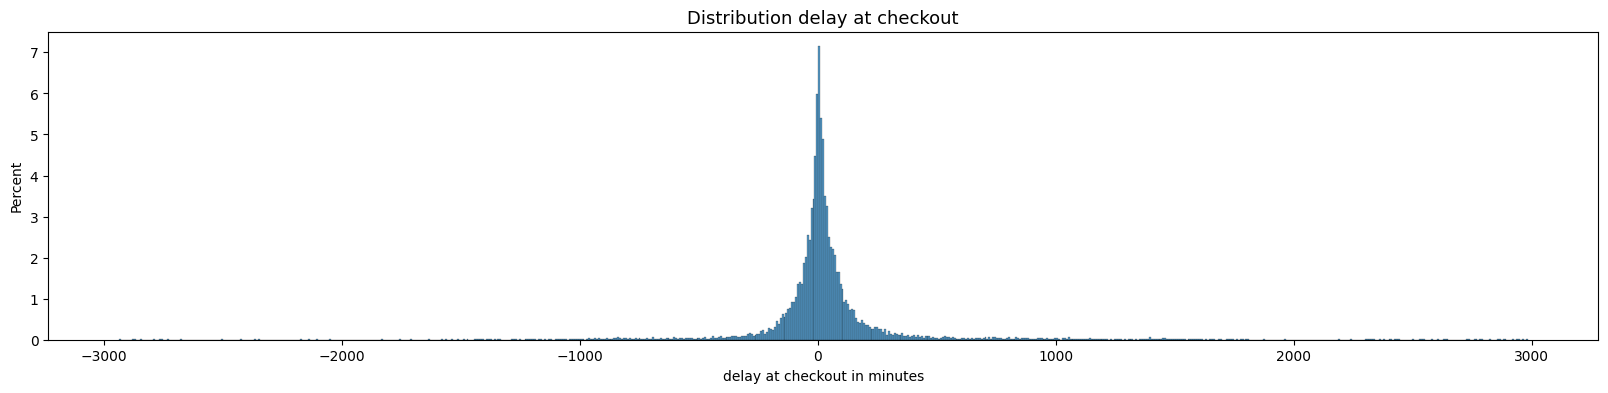

In [ ]:
plt.figure(figsize = (20,4));
ax = sns.histplot(data=df_delay_clean, x='delay_at_checkout_in_minutes', stat='percent');
ax.set_xlabel('delay at checkout in minutes');
ax.set_title('Distribution delay at checkout', fontsize=13);
plt.show()

In [ ]:
delay_co = df_delay_clean.groupby('checkin_type', as_index=False).agg({'delay_at_checkout_in_minutes':['min','max','median']})
delay_co

checkin_type delay_at_checkout_in_minutes               
                                        min     max median
0      connect                      -2938.0  1466.0   -9.0
1       mobile                      -2878.0  2984.0   13.0

In [ ]:
#### How often are drivers late for the next check-in?

In [ ]:
result = []
for i in df_delay_clean['delay_at_checkout_in_minutes']:
    if i < 0:
        result.append('driver late')
    elif i == 0:
        result.append('driver on time')
    else:
        result.append('driver in advance')
df_delay_clean['type_driver'] = result

C:\Users\fanny\AppData\Local\Temp\ipykernel_14068\3496881057.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_delay_clean

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,type_driver
1,507750,269550,mobile,ended,-81.0,driver late
2,508131,359049,connect,ended,70.0,driver in advance
5,511626,398802,mobile,ended,-203.0,driver late
6,511639,370585,connect,ended,-15.0,driver late
7,512303,371242,mobile,ended,-44.0,driver late
...,...,...,...,...,...,...
21304,573322,376491,connect,ended,-66.0,driver late
21306,573790,341965,mobile,ended,-337.0,driver late
21307,573791,364890,mobile,ended,144.0,driver in advance
21308,574852,362531,connect,ended,-76.0,driver late


In [ ]:
df_delay = df_delay.drop(columns=['previous_ended_rental_id','time_delta_with_previous_rental_in_minutes'])
df_delay = df_delay.dropna(axis=0, subset='delay_at_checkout_in_minutes')
# Remove outliers
upper_limit = df_delay['delay_at_checkout_in_minutes'].mean() + 3*df_delay['delay_at_checkout_in_minutes'].std()
lower_limit = df_delay['delay_at_checkout_in_minutes'].mean() - 3*df_delay['delay_at_checkout_in_minutes'].std()
df_delay_clean = df_delay[(df_delay['delay_at_checkout_in_minutes']<upper_limit) & (df_delay['delay_at_checkout_in_minutes']>lower_limit)]
result = []
for i in df_delay_clean['delay_at_checkout_in_minutes']:
    if i < 0:
        result.append('driver late')
    elif i == 0:
        result.append('driver on time')
    else:
        result.append('driver in advance')
df_delay_clean['type_driver'] = result

st.subheader("How often drivers are late in general?")

palette_pie = {'driver on time':'mistyrose','driver late':'red', 'driver in advance':'salmon'}
labels_pie=['driver on time','driver late', 'driver in advance']
fig = df_delay_clean.groupby('type_driver').count()['checkin_type'].plot(kind='pie', autopct='%1.1f%%', explode=[0,0,0.5], pctdistance=0.7, colors= [palette_pie[key] for key in labels_pie[0:]],  ax=axes[0]);
st.pyplot(fig)

KeyError: "['previous_ended_rental_id', 'time_delta_with_previous_rental_in_minutes'] not found in axis"

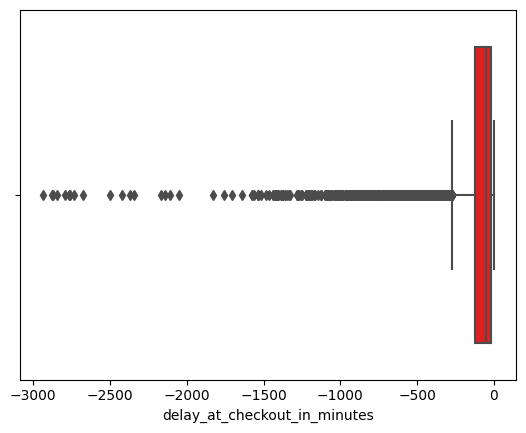

In [365]:
delay = df_delay_clean[df_delay_clean['delay_at_checkout_in_minutes'] <0]
advance = df_delay_clean[df_delay_clean['delay_at_checkout_in_minutes'] >0]
sns.boxplot(data= delay, x='delay_at_checkout_in_minutes', color='red');


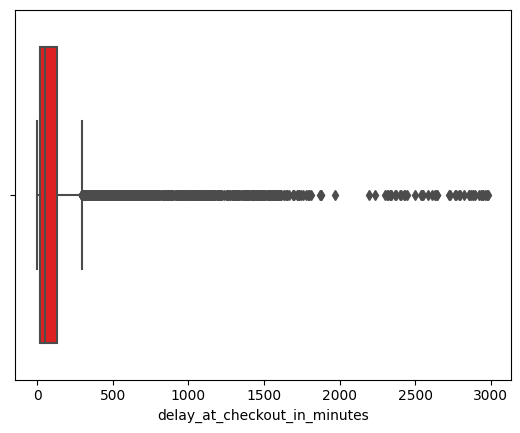

In [366]:
sns.boxplot(data= advance, x='delay_at_checkout_in_minutes', color='red');

In [367]:
df_delay_clean

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,type_driver
1,507750,269550,mobile,ended,-81.0,driver late
2,508131,359049,connect,ended,70.0,driver in advance
5,511626,398802,mobile,ended,-203.0,driver late
6,511639,370585,connect,ended,-15.0,driver late
7,512303,371242,mobile,ended,-44.0,driver late
...,...,...,...,...,...,...
21304,573322,376491,connect,ended,-66.0,driver late
21306,573790,341965,mobile,ended,-337.0,driver late
21307,573791,364890,mobile,ended,144.0,driver in advance
21308,574852,362531,connect,ended,-76.0,driver late


In [370]:
df_delay_clean = df_delay_clean[df_delay_clean['type_driver'] != 'driver on time']

In [371]:
df_delay_clean['type_driver'].value_counts()

driver in advance    9344
driver late          6810
Name: type_driver, dtype: int64

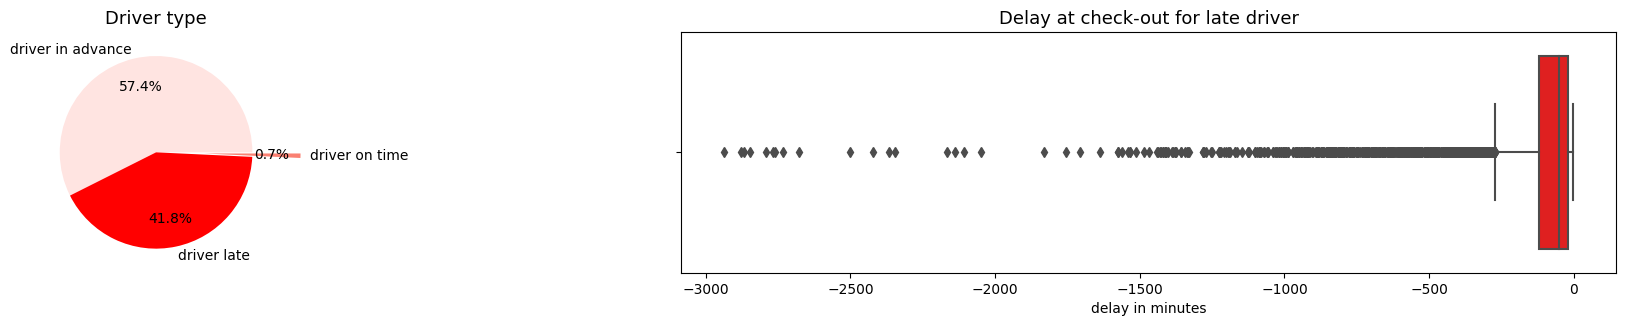

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 3), dpi=100)
plt.tight_layout()

palette_pie = {'driver on time':'mistyrose','driver late':'red', 'driver in advance':'salmon'}
labels_pie=['driver on time','driver late', 'driver in advance']
df_delay_clean.groupby('type_driver').count()['checkin_type'].plot(kind='pie', autopct='%1.1f%%', explode=[0,0,0.5], pctdistance=0.7, colors= [palette_pie[key] for key in labels_pie[0:]],  ax=axes[0]);

delay = df_delay_clean[df_delay_clean['delay_at_checkout_in_minutes'] <0]
advance = df_delay_clean[df_delay_clean['delay_at_checkout_in_minutes'] >0]
sns.boxplot(data= delay, x='delay_at_checkout_in_minutes', ax=axes[1], color='red');
sns.boxplot(data= delay, x='delay_at_checkout_in_minutes', ax=axes[1], color='red');

axes[0].set_ylabel('');
axes[0].set_title('Driver type', fontsize=13);
axes[1].set_ylabel('');
axes[1].set_xlabel('delay in minutes');
axes[1].set_title('Delay at check-out for late driver', fontsize=13);


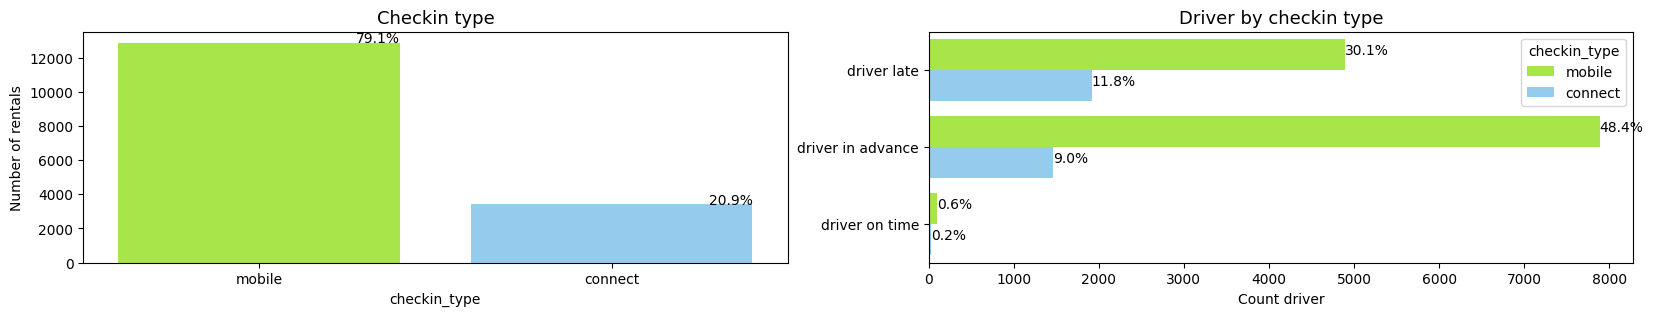

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 3), dpi=100)
#plt.tight_layout()

palette_count ={'mobile':"greenyellow",'connect':"lightskyblue"}
sns.countplot(x=df_delay_clean['checkin_type'], palette=palette_count, ax=axes[0]);
total_countplot = len(df_delay_clean['checkin_type'])
for z in axes[0].patches:
    percentage = '{:.1f}%'.format(100 * z.get_height()/total_countplot)
    x = z.get_x() + z.get_width()
    y = z.get_height()
    axes[0].annotate(percentage, (x, y),ha='right')

sns.countplot(y=df_delay_clean['type_driver'], hue=df_delay_clean['checkin_type'], ax=axes[1], palette=palette_count)
total = len(df_delay_clean['type_driver'])
for p in axes[1].patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        axes[1].annotate(percentage, (x, y))

axes[0].set_ylabel('Number of rentals');
axes[0].set_title('Checkin type', fontsize=13);
axes[1].set_title('Driver by checkin type', fontsize=13);
axes[1].set_ylabel('');
axes[1].set_xlabel('Count driver');